# Assignment 3 - Credit Risk Scoring

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

<IPython.core.display.Javascript object>

In [3]:
data = pd.read_csv("01_Data/credit_train.csv")
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


<IPython.core.display.Javascript object>

In [4]:
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


<IPython.core.display.Javascript object>

In [5]:
# Remove missing values for target variable
data.dropna(subset=["Loan Status"], inplace=True)

<IPython.core.display.Javascript object>

In [6]:
# Impute missing values for annual income with the mean
data["Annual Income"].fillna(data["Annual Income"].mean(), inplace=True)

<IPython.core.display.Javascript object>

In [7]:
# Create default flag
data["default"] = data["Loan Status"].apply(lambda x: 0 if x == "Fully Paid" else 1)
# Create flag for short term vs long term
data["loan_term"] = data["Term"].apply(lambda x: 0 if x == "Short term" else 1)

<IPython.core.display.Javascript object>

In [8]:
# Rescale credit scores above 850
data["Credit Score"] = data["Credit Score"].apply(
    lambda val: (val / 10) if val > 850 else val
)

<IPython.core.display.Javascript object>

In [9]:
# Remove fields that are not needed
data.drop(
    labels=["Loan ID", "Customer ID", "Loan Status", "Term"], axis=1, inplace=True
)

<IPython.core.display.Javascript object>

In [10]:
data

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,default,loan_term
0,445412.0,709.0,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1
1,262328.0,NaN,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0,1
2,99999999.0,741.0,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1
3,347666.0,721.0,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,0,1
4,176220.0,NaN,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1
5,206602.0,729.0,8.968570e+05,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0,1,1
6,217646.0,730.0,1.184194e+06,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,0,1
7,648714.0,NaN,1.378277e+06,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0,1,1
8,548746.0,678.0,2.559110e+06,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0,0,1
9,215952.0,739.0,1.454735e+06,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0,0,1


<IPython.core.display.Javascript object>

In [11]:
# Check initial number of observations - 100,000
print(len(data))
# Check number of observations if we remove rows with missing data - 36,423
data_dropna = data.dropna()
print(len(data_dropna))

100000
36423


<IPython.core.display.Javascript object>

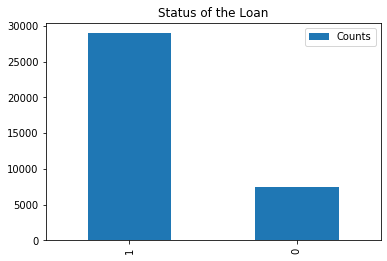

<IPython.core.display.Javascript object>

In [12]:
coffvalue = data_dropna[data_dropna["default"] == 0]["default"].count()
fpaidvalue = data_dropna[data_dropna["default"] == 1]["default"].count()
data_plot = {"Counts": [coffvalue, fpaidvalue]}
statusDF = pd.DataFrame(data_plot, index=[1, 0])
# statusDF.head()
statusDF.plot(kind="bar", title="Status of the Loan")

In [13]:
performing = data_dropna[data_dropna["default"] == 0]["default"].count()
defaults = data_dropna[data_dropna["default"] == 1]["default"].count()

count_defaults = {"Count default": [performing, defaults]}
count_defaults_df = pd.DataFrame(count_defaults, index=["Default", "Performing"])
count_defaults_df.head()

,Count default
Default,28972
Performing,7451


<IPython.core.display.Javascript object>

In [14]:
st = data_dropna[data_dropna["loan_term"] == 0]["loan_term"].count()
lt = data_dropna[data_dropna["loan_term"] == 1]["loan_term"].count()

count_term = {"Count term": [st, lt]}
count_term_df = pd.DataFrame(count_term, index=["Short term", "Long term"])
count_term_df.head()

,Count term
Short term,0
Long term,36423


<IPython.core.display.Javascript object>

## Variable transformation

### Credit Score

Since our problem is a classification problem, we can't have continuos variables in our dataframe. After the calculation of the missing variables we give our credit scores a range based on Experian's Credit Score Range.

In [15]:
data_dropna["Credit Score"] = data_dropna["Credit Score"].apply(
    lambda val: "Poor" if np.isreal(val) and val < 580 else val
)
data_dropna["Credit Score"] = data_dropna["Credit Score"].apply(
    lambda val: "Average" if np.isreal(val) and (val >= 580 and val < 670) else val
)
data_dropna["Credit Score"] = data_dropna["Credit Score"].apply(
    lambda val: "Good" if np.isreal(val) and (val >= 670 and val < 740) else val
)
data_dropna["Credit Score"] = data_dropna["Credit Score"].apply(
    lambda val: "Very Good" if np.isreal(val) and (val >= 740 and val < 800) else val
)
data_dropna["Credit Score"] = data_dropna["Credit Score"].apply(
    lambda val: "Exceptional" if np.isreal(val) and (val >= 800 and val <= 850) else val
)

C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

<IPython.core.display.Javascript object>

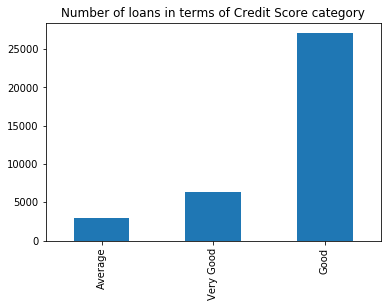

<IPython.core.display.Javascript object>

In [16]:
data_dropna["Credit Score"].value_counts().sort_values(ascending=True).plot(
    kind="bar", title="Number of loans in terms of Credit Score category"
)

In [17]:
data_dropna = data_dropna.join(
    pd.get_dummies(data_dropna["Credit Score"], drop_first=True)
)

<IPython.core.display.Javascript object>

In [18]:
data_dropna = data_dropna.rename(
    index=str,
    columns={
        "Average ": "Credit Average",
        "Good": "Credit Good",
        "Very Good": "Credit Very Good",
    },
)

<IPython.core.display.Javascript object>

In [19]:
data_dropna = data_dropna.drop(["Credit Score"], axis=1)

<IPython.core.display.Javascript object>

In [20]:
data_dropna

,Current Loan Amount,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,default,loan_term,Credit Good,Credit Very Good
2,99999999.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1,0,1
6,217646.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,0,1,1,0
8,548746.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0,0,1,1,0
10,99999999.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0,0,1,1,0
12,99999999.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0,0,1,0,1
14,234124.0,693234.0,10+ years,Rent,Debt Consolidation,14211.24,24.7,46.0,10.0,1.0,28291.0,107052.0,1.0,0.0,0,1,1,0
17,666204.0,1821967.0,10+ years,Home Mortgage,Debt Consolidation,17612.24,22.0,34.0,15.0,0.0,813694.0,2004618.0,0.0,0.0,0,1,1,0
20,317108.0,1133274.0,8 years,Rent,Debt Consolidation,9632.81,17.4,53.0,4.0,0.0,60287.0,126940.0,0.0,0.0,1,1,1,0
25,465410.0,1722654.0,3 years,Rent,Buy House,15647.45,22.3,30.0,7.0,0.0,107559.0,488356.0,0.0,0.0,0,1,1,0
28,99999999.0,1749748.0,10+ years,Home Mortgage,Debt Consolidation,19247.19,20.0,32.0,17.0,0.0,224390.0,295240.0,0.0,0.0,0,1,0,1


<IPython.core.display.Javascript object>